# Table of Contents

1. <a href='#intro'>Introduction</a>
2. <a href='#idea'>Idea Generation</a>
3. <a href='#eda'>Exploratory Data Analysis (EDA)</a>
    1. <a href='#libraries'>Importing the Required Libraries</a>
    2. <a href='#loading'>Loading the Data into the DataFrame</a>
    3. <a href='#histogram'>Histogram Analysis</a>
    4. <a href='#irrelevant'>Dropping Irrelevant Columns</a>
    5. <a href='#null'>Dropping the Missing or Null Values</a>
    6. <a href='#fd'>Analysis on Feature Distribution</a>
    7. <a href='#corr'>Correlation Analysis</a>
        1. <a href='#track'>Correlation with respect to M_TRACK_ID</a>
        2. <a href='#air'>Correlation with respect to M_AIR_TEMPERATURE</a>
    8. <a href='#imp-features'>Extracting Important Features</a>
4. <a href='#detect'>Outlier Detection</a>
5. <a href='#remove'>Outlier Removal</a>
6. <a href='#evaluate'>Model Evaluation</a>

<a id='intro'></a>
# Introduction

The inspiration to explore this idea is [FormulaAIHackathon 2022](https://formulaaihack.com/) and we, **VoyagerBangla** Team, have participated in this competition. This notebook aims to handle outlier detection with respect to the distribution of the dataset they are pulled from.

<a id='idea'></a>
# Idea Generation

<a id='eda'></a>
# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a technique for understanding data sets by summarizing their main features and frequently visualizing them. This stage is critical, even more so when we reach the point of modeling the data in order to use machine learning. Data exploration frequently takes a long time. Through the EDA procedure, we may request that the issue statement or definition be defined on the dataset, which is critical.



<a id='libraries'></a>
## Importing the required libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
from sklearn.metrics import classification_report, accuracy_score, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate, learning_curve, cross_val_score, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss

from xgboost.sklearn import XGBClassifier

<a id='loading'></a>
## Loading the data into the DataFrame

In [4]:
main_df = pd.read_csv('../input/formulaaihackathon2022/weather.csv')
main_df.head()

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,...,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,Unnamed: 58
0,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
1,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
2,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
3,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
4,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN


In [5]:
main_df.describe()

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,...,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,Unnamed: 58
count,3572328.0,3572328.0,3.572328e+06,3572328.0,3572328.0,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3572328.0,...,3.572328e+06,3.572328e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,0.0
mean,2021.0,1.0,1.410704e+01,1.0,1.0,8.239394e+18,1.019926e+03,2.857427e+04,9.212292e+00,255.0,...,4.595344e+01,7.583221e+01,2.261691e-01,1.709807e+02,1.580382e-01,1.487266e-03,6.307732e-01,3.153866e-01,1.687091e+01,NaN
std,0.0,0.0,3.091641e-01,0.0,0.0,5.119260e+18,1.682487e+03,5.428773e+04,9.217495e+00,0.0,...,3.811992e+01,8.123138e+00,4.183500e-01,6.422035e+01,3.647768e-01,3.853640e-02,9.293394e-01,4.646697e-01,1.092343e+00,NaN
min,2021.0,1.0,1.400000e+01,1.0,1.0,2.106082e+16,4.000000e-03,0.000000e+00,0.000000e+00,255.0,...,0.000000e+00,6.000000e+01,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,NaN
25%,2021.0,1.0,1.400000e+01,1.0,1.0,3.591802e+18,1.138000e+02,3.007000e+03,0.000000e+00,255.0,...,3.100000e+01,8.000000e+01,0.000000e+00,2.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,NaN
50%,2021.0,1.0,1.400000e+01,1.0,1.0,7.802116e+18,4.319240e+02,1.174900e+04,2.000000e+00,255.0,...,3.100000e+01,8.000000e+01,0.000000e+00,2.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,NaN
75%,2021.0,1.0,1.400000e+01,1.0,1.0,1.279207e+19,1.024212e+03,2.972400e+04,1.900000e+01,255.0,...,9.000000e+01,8.000000e+01,0.000000e+00,2.000000e+02,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.800000e+01,NaN
max,2021.0,1.0,1.500000e+01,1.0,1.0,1.826297e+19,9.686959e+03,3.339170e+05,1.900000e+01,255.0,...,1.100000e+02,8.000000e+01,1.000000e+00,2.000000e+02,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.900000e+01,NaN


<a id='histogram'></a>
## Histogram Analysis

array([[<AxesSubplot:title={'center':'M_PACKET_FORMAT'}>,
        <AxesSubplot:title={'center':'M_GAME_MAJOR_VERSION'}>,
        <AxesSubplot:title={'center':'M_GAME_MINOR_VERSION'}>,
        <AxesSubplot:title={'center':'M_PACKET_VERSION'}>,
        <AxesSubplot:title={'center':'M_PACKET_ID'}>,
        <AxesSubplot:title={'center':'M_SESSION_UID'}>,
        <AxesSubplot:title={'center':'M_SESSION_TIME'}>,
        <AxesSubplot:title={'center':'M_FRAME_IDENTIFIER'}>],
       [<AxesSubplot:title={'center':'M_PLAYER_CAR_INDEX'}>,
        <AxesSubplot:title={'center':'M_SECONDARY_PLAYER_CAR_INDEX'}>,
        <AxesSubplot:title={'center':'M_BRAKING_ASSIST'}>,
        <AxesSubplot:title={'center':'M_SESSION_LINK_IDENTIFIER'}>,
        <AxesSubplot:title={'center':'M_PIT_RELEASE_ASSIST'}>,
        <AxesSubplot:title={'center':'TIMESTAMP'}>,
        <AxesSubplot:title={'center':'M_ZONE_START'}>,
        <AxesSubplot:title={'center':'M_ZONE_FLAG'}>],
       [<AxesSubplot:title={'center':'M_PIT_

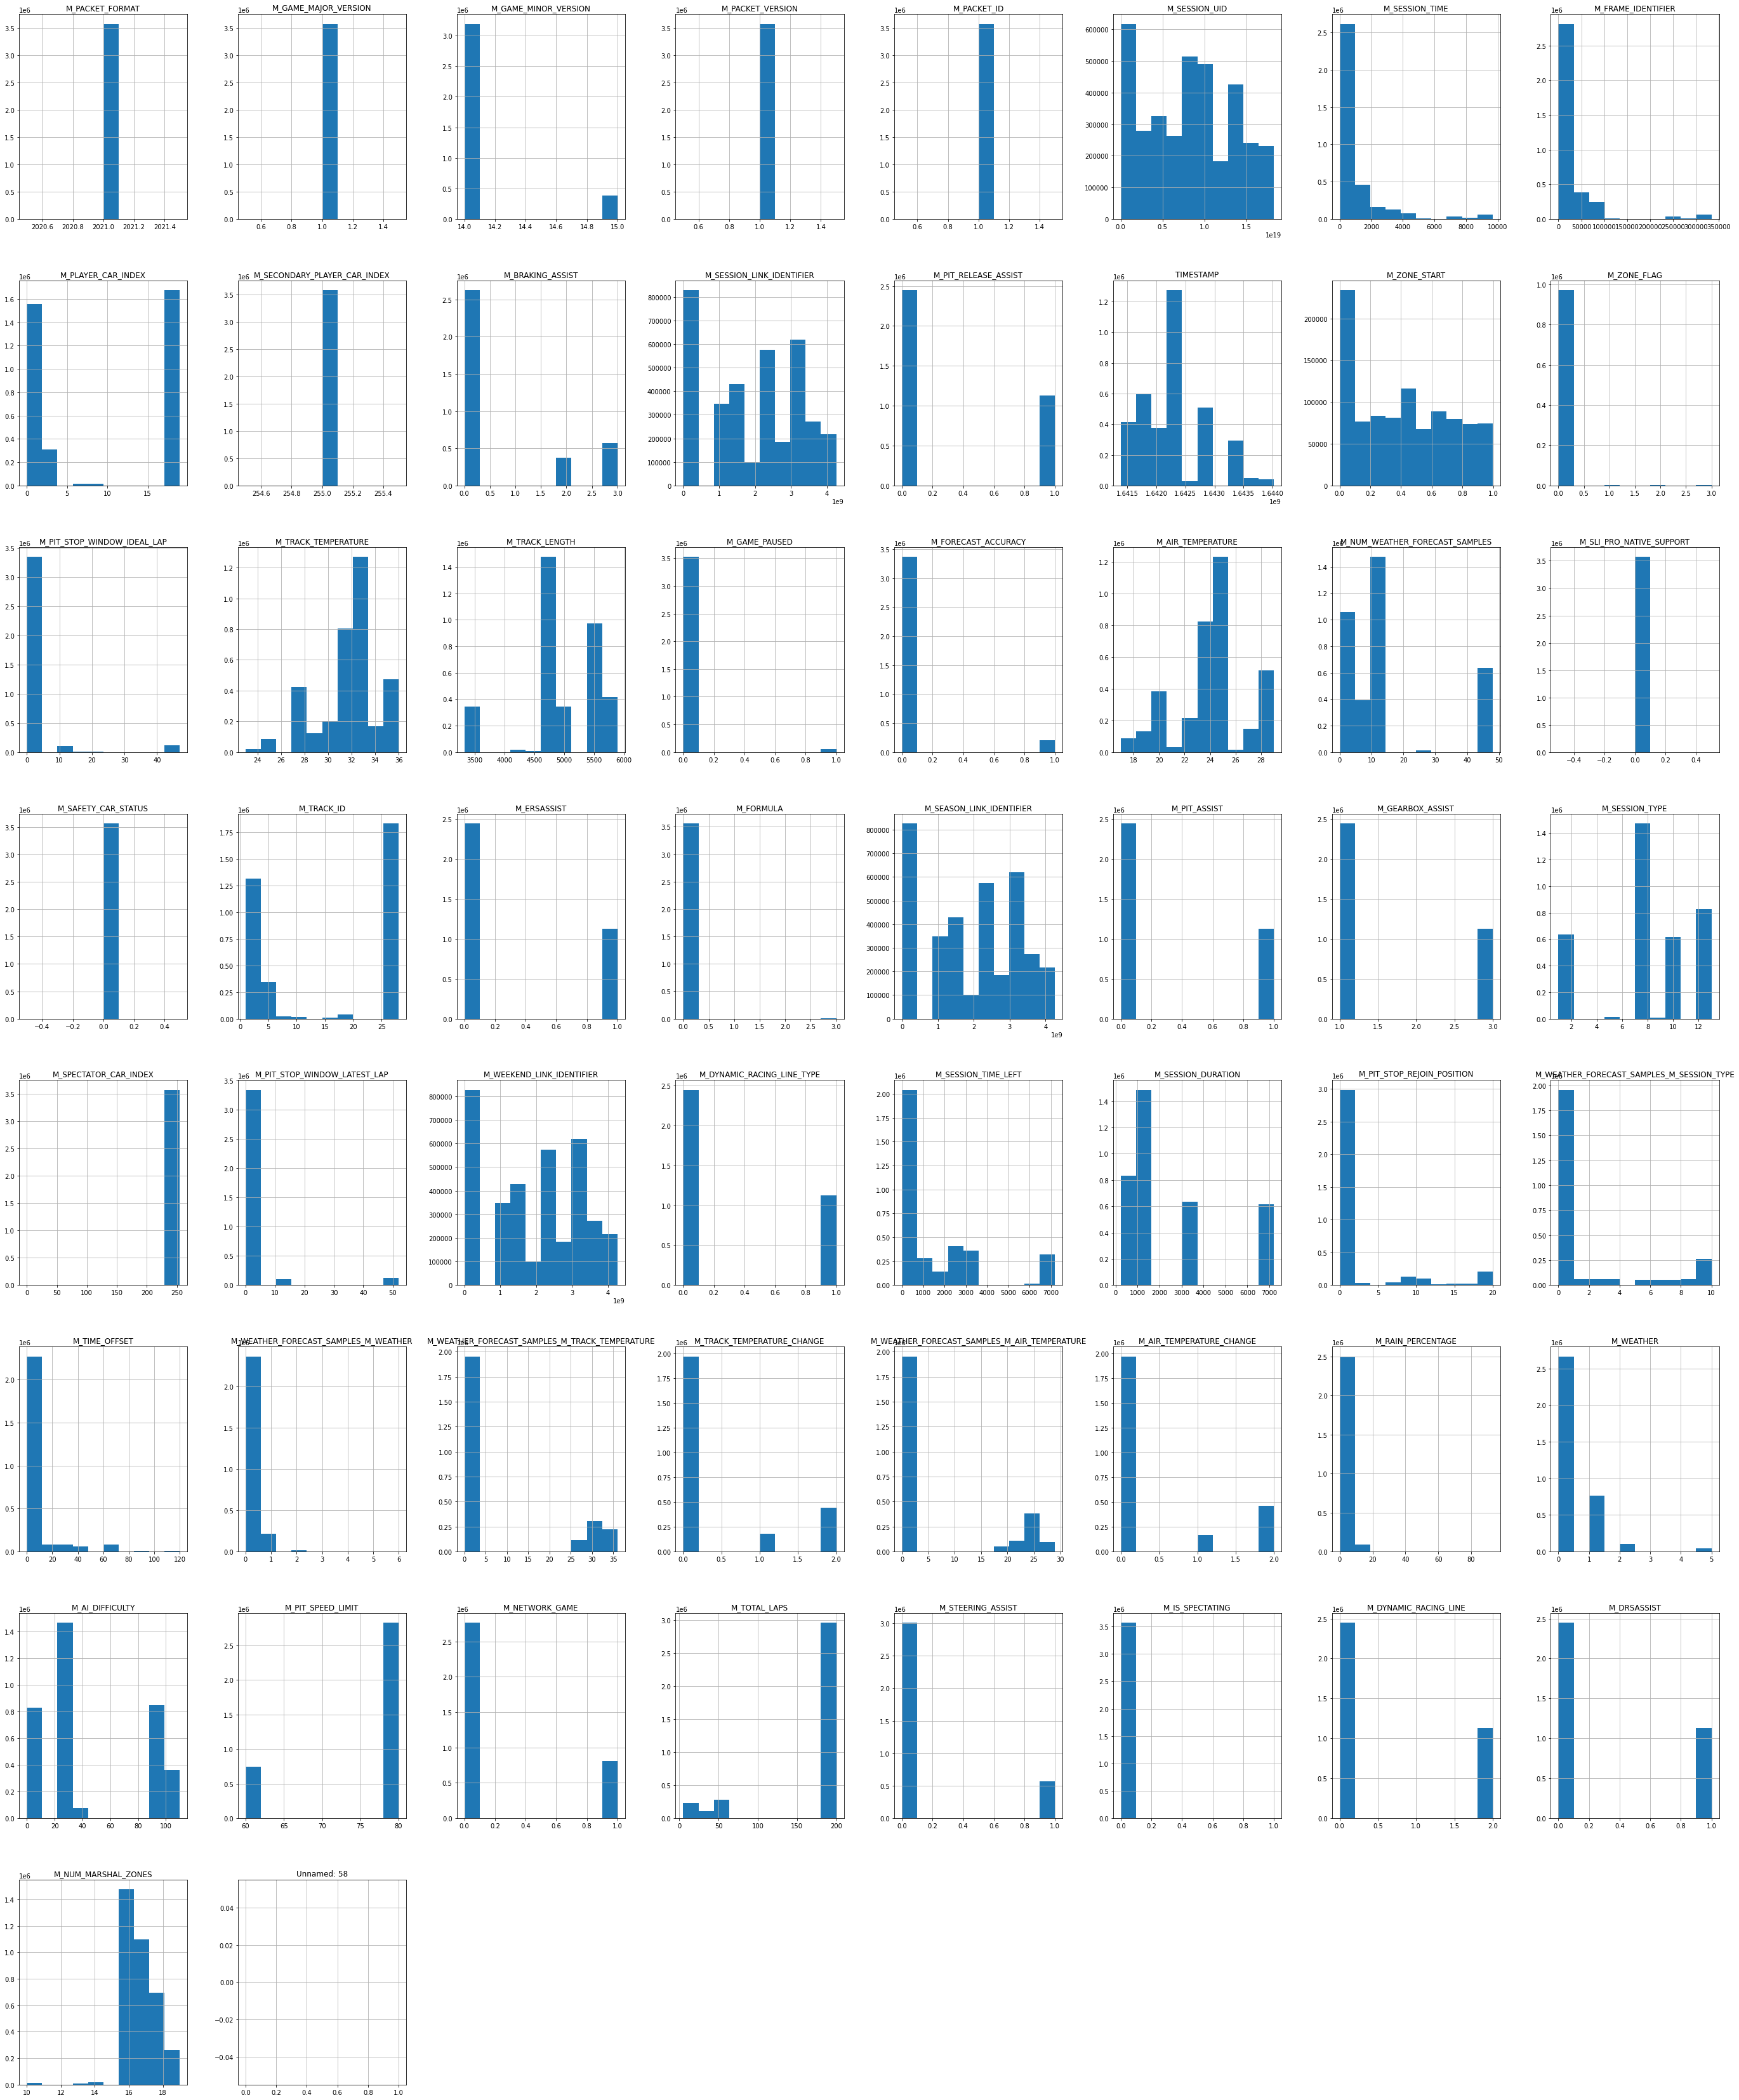

In [6]:
main_df.hist(figsize=(48, 60))

From the histogram we can verify that the features shown below don't have any importance to predict targets.

* M_PACKET_FORMAT
* M_GAME_MAJOR_VERSION
* M_GAME_MINOR_VERSION
* M_PACKET_VERSION
* M_PACKET_ID
* M_SECONDARY_PLAYER_INDEX
* M_ZONE_FLAG
* M_SLI_PRO_NATIVE_SUPPORT
* M_SAFETY_CAR_STATUS
* M_FORMULA
* M_SPECTATOR_CAR_INDEX
* M_IS_SPECTATING
* M_ZONE_START
* GAMEHOST
* Unnamed: 58

<a id='irrelevant'></a>
## Dropping Irrelavent Columns

This step is necessary in EDA because there are occasions when there are several columns that we never utilize; in our circumstances, eliminating the above features is the only option.

In [5]:
main_df = main_df.drop(['M_PACKET_FORMAT', 'M_GAME_MAJOR_VERSION', 'M_GAME_MINOR_VERSION', 'M_PACKET_VERSION','M_PACKET_ID'
,'M_SECONDARY_PLAYER_CAR_INDEX','M_ZONE_FLAG','M_SLI_PRO_NATIVE_SUPPORT','M_SAFETY_CAR_STATUS'
,'M_FORMULA','M_SPECTATOR_CAR_INDEX','M_IS_SPECTATING','Unnamed: 58', 'M_ZONE_START', 'GAMEHOST'], axis=1)

<a id='null'></a>
## Dropping the Missing or Null Values

In [8]:
main_df.isnull().sum()

M_SESSION_UID                                          0
M_SESSION_TIME                                         0
M_FRAME_IDENTIFIER                                     0
M_PLAYER_CAR_INDEX                                     0
M_BRAKING_ASSIST                                       0
M_SESSION_LINK_IDENTIFIER                              0
M_PIT_RELEASE_ASSIST                                   0
TIMESTAMP                                              0
M_PIT_STOP_WINDOW_IDEAL_LAP                            0
M_TRACK_TEMPERATURE                                    0
M_TRACK_LENGTH                                         0
M_GAME_PAUSED                                          0
M_FORECAST_ACCURACY                                    0
M_AIR_TEMPERATURE                                      0
M_NUM_WEATHER_FORECAST_SAMPLES                         0
M_TRACK_ID                                             0
M_ERSASSIST                                            0
M_SEASON_LINK_IDENTIFIER       

In [6]:
df_no_nan = main_df.replace([np.inf,-np.inf], np.nan)
df_without_null = df_no_nan.dropna(subset=['M_RAIN_PERCENTAGE', 'M_NUM_MARSHAL_ZONES', 'M_DRSASSIST', 'M_DYNAMIC_RACING_LINE',
                                          'M_STEERING_ASSIST', 'M_TOTAL_LAPS', 'M_NETWORK_GAME'])

In [6]:
df_without_null.isnull().sum()

M_SESSION_UID                                     0
M_SESSION_TIME                                    0
M_FRAME_IDENTIFIER                                0
M_PLAYER_CAR_INDEX                                0
M_BRAKING_ASSIST                                  0
M_SESSION_LINK_IDENTIFIER                         0
M_PIT_RELEASE_ASSIST                              0
TIMESTAMP                                         0
M_PIT_STOP_WINDOW_IDEAL_LAP                       0
M_TRACK_TEMPERATURE                               0
M_TRACK_LENGTH                                    0
M_GAME_PAUSED                                     0
M_FORECAST_ACCURACY                               0
M_AIR_TEMPERATURE                                 0
M_NUM_WEATHER_FORECAST_SAMPLES                    0
M_TRACK_ID                                        0
M_ERSASSIST                                       0
M_SEASON_LINK_IDENTIFIER                          0
M_PIT_ASSIST                                      0
M_GEARBOX_AS

<a id='fd'></a>
## Analysis on Feature Distribution

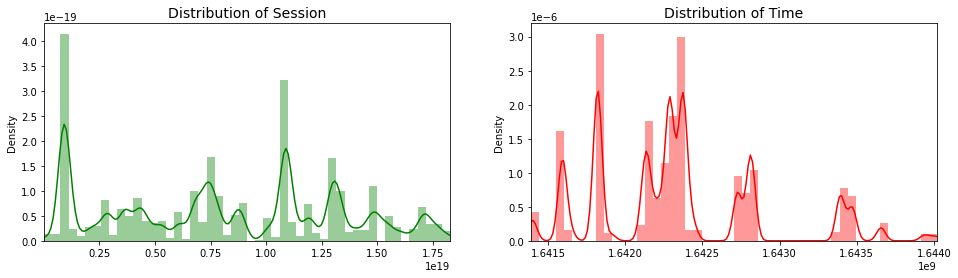

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

session_val = df_without_null['M_SESSION_UID'].values
time_val = df_without_null['TIMESTAMP'].values

sns.distplot(session_val, ax=ax[0], color='g')
ax[0].set_title('Distribution of Session', fontsize=14)
ax[0].set_xlim([min(session_val), max(session_val)])

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

<a id='corr'></a>
## Correlation Analysis

<AxesSubplot:>

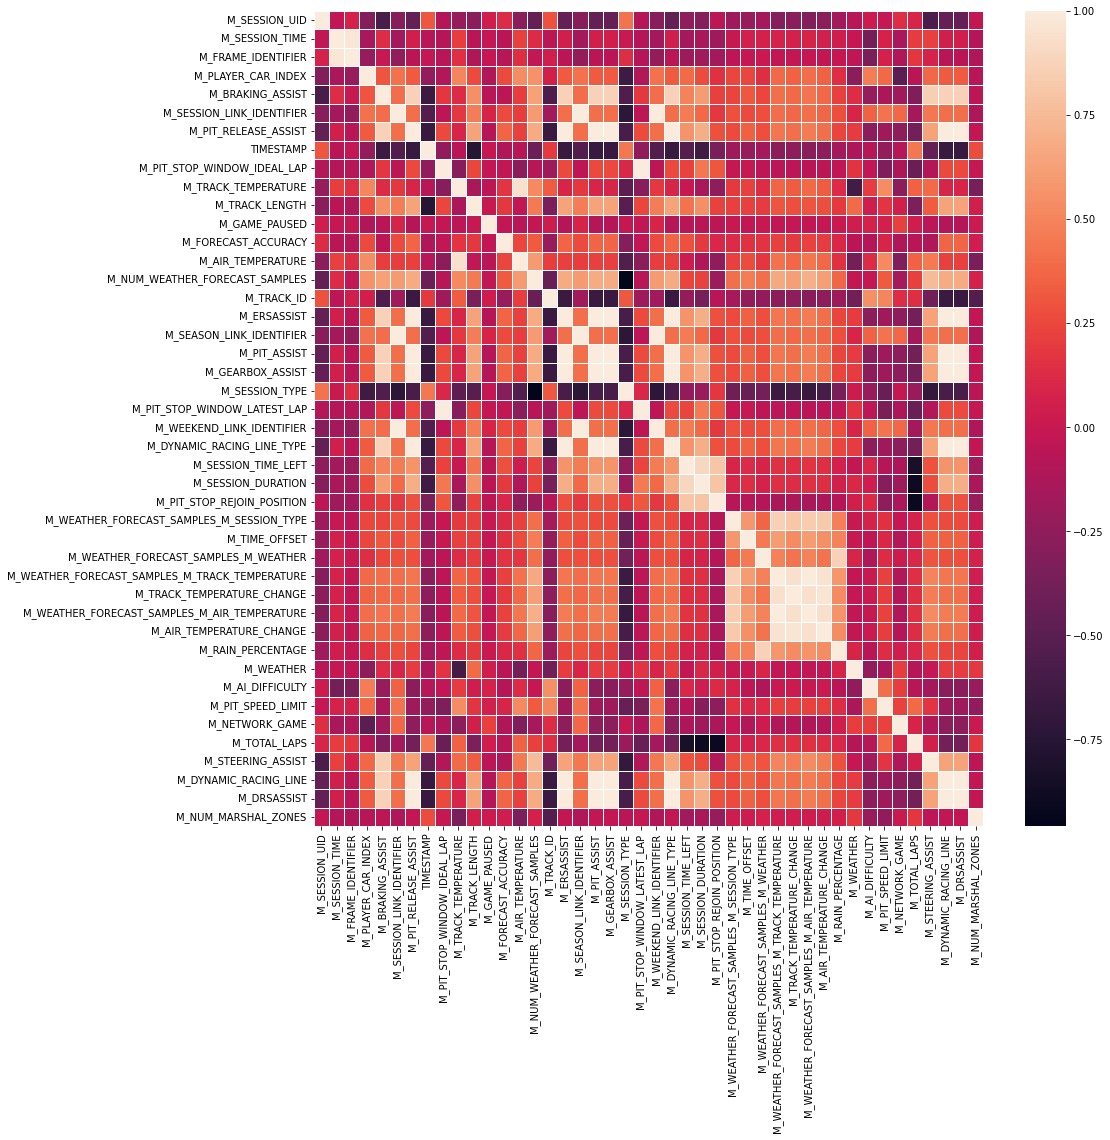

In [10]:
corr = df_without_null.corr()

# plotting the heatmap
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=1.0)

<a id='track_id'></a>
#### Correlation with respect to M_TRACK_ID

In [11]:
track_ids = df_without_null['M_TRACK_ID'].unique().tolist()
first_track_id_df = df_without_null[df_without_null['M_TRACK_ID'] == track_ids[2]]
first_track_id_df.head()

,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_SESSION_LINK_IDENTIFIER,M_PIT_RELEASE_ASSIST,TIMESTAMP,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,...,M_RAIN_PERCENTAGE,M_WEATHER,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
57463,1.647800e+19,63.133,1670,0,0,0,0,1.643939e+09,0,23,...,0.0,5,0,60,0.0,200.0,0.0,0.0,0.0,17.0
57464,1.647800e+19,63.133,1670,0,0,0,0,1.643939e+09,0,23,...,0.0,5,0,60,0.0,200.0,0.0,0.0,0.0,17.0
57465,1.647800e+19,63.133,1670,0,0,0,0,1.643939e+09,0,23,...,0.0,5,0,60,0.0,200.0,0.0,0.0,0.0,17.0
57466,1.647800e+19,63.133,1670,0,0,0,0,1.643939e+09,0,23,...,0.0,5,0,60,0.0,200.0,0.0,0.0,0.0,17.0
57467,1.647800e+19,63.133,1670,0,0,0,0,1.643939e+09,0,23,...,0.0,5,0,60,0.0,200.0,0.0,0.0,0.0,17.0


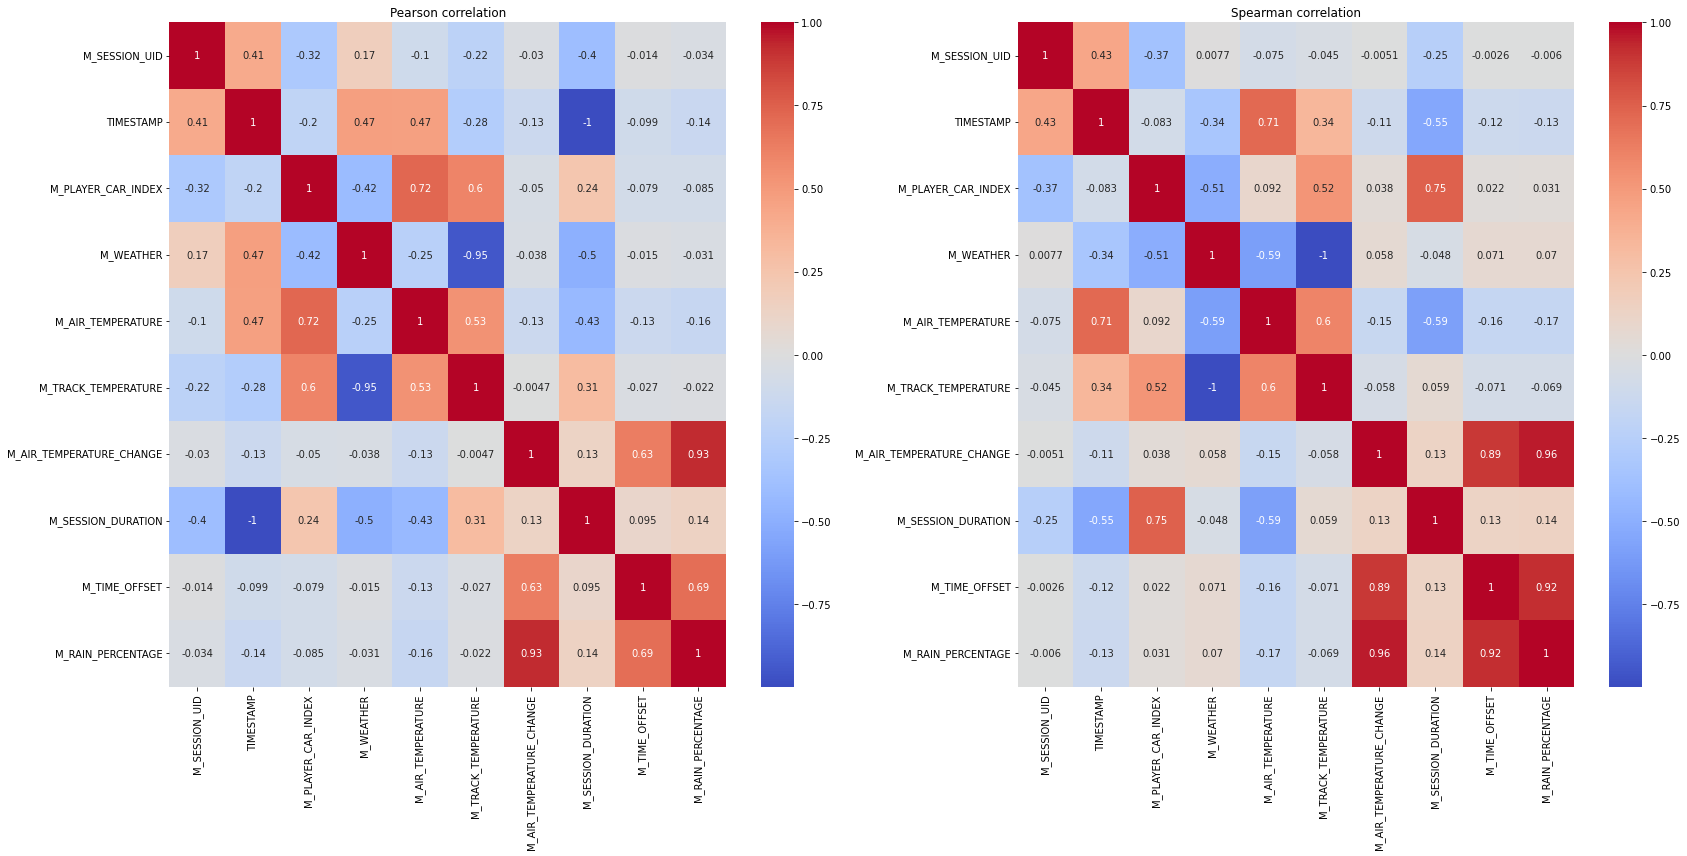

In [12]:
cols = ['M_SESSION_UID', 'TIMESTAMP', 'M_PLAYER_CAR_INDEX', 'M_WEATHER', 'M_AIR_TEMPERATURE', 'M_TRACK_TEMPERATURE', 'M_AIR_TEMPERATURE_CHANGE', 'M_SESSION_DURATION', 'M_TIME_OFFSET', 'M_RAIN_PERCENTAGE']

a = first_track_id_df.loc[first_track_id_df['M_TRACK_ID'] == track_ids[2],cols]
fig, ax = plt.subplots(figsize=(24, 12))
plt.subplot(1, 2, 1)
sns.heatmap(a.corr(), cmap='coolwarm', annot=True)
plt.title('Pearson correlation')
plt.subplot(1, 2, 2)
sns.heatmap(a.corr(method="spearman"), cmap='coolwarm', annot=True)
plt.title('Spearman correlation')
plt.tight_layout()

<a id='air'></a>
Correlation with respect to M_AIR_TEMPERATURE

In [14]:
air_temp = df_without_null['M_AIR_TEMPERATURE'].unique().tolist()
first_air_temp_df = df_without_null[df_without_null['M_AIR_TEMPERATURE'] == air_temp[2]]
first_air_temp_df.head()

,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_SESSION_LINK_IDENTIFIER,M_PIT_RELEASE_ASSIST,TIMESTAMP,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,...,M_RAIN_PERCENTAGE,M_WEATHER,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
10031,7.338505e+18,740.815,22002,0,0,0,0,1.643382e+09,0,31,...,0.0,0,0,60,0.0,200.0,0.0,0.0,0.0,18.0
10032,7.338505e+18,740.815,22002,0,0,0,0,1.643382e+09,0,31,...,0.0,0,0,60,0.0,200.0,0.0,0.0,0.0,18.0
10033,7.338505e+18,740.815,22002,0,0,0,0,1.643382e+09,0,31,...,0.0,0,0,60,0.0,200.0,0.0,0.0,0.0,18.0
10034,7.338505e+18,740.815,22002,0,0,0,0,1.643382e+09,0,31,...,0.0,0,0,60,0.0,200.0,0.0,0.0,0.0,18.0
10035,7.338505e+18,740.815,22002,0,0,0,0,1.643382e+09,0,31,...,0.0,0,0,60,0.0,200.0,0.0,0.0,0.0,18.0


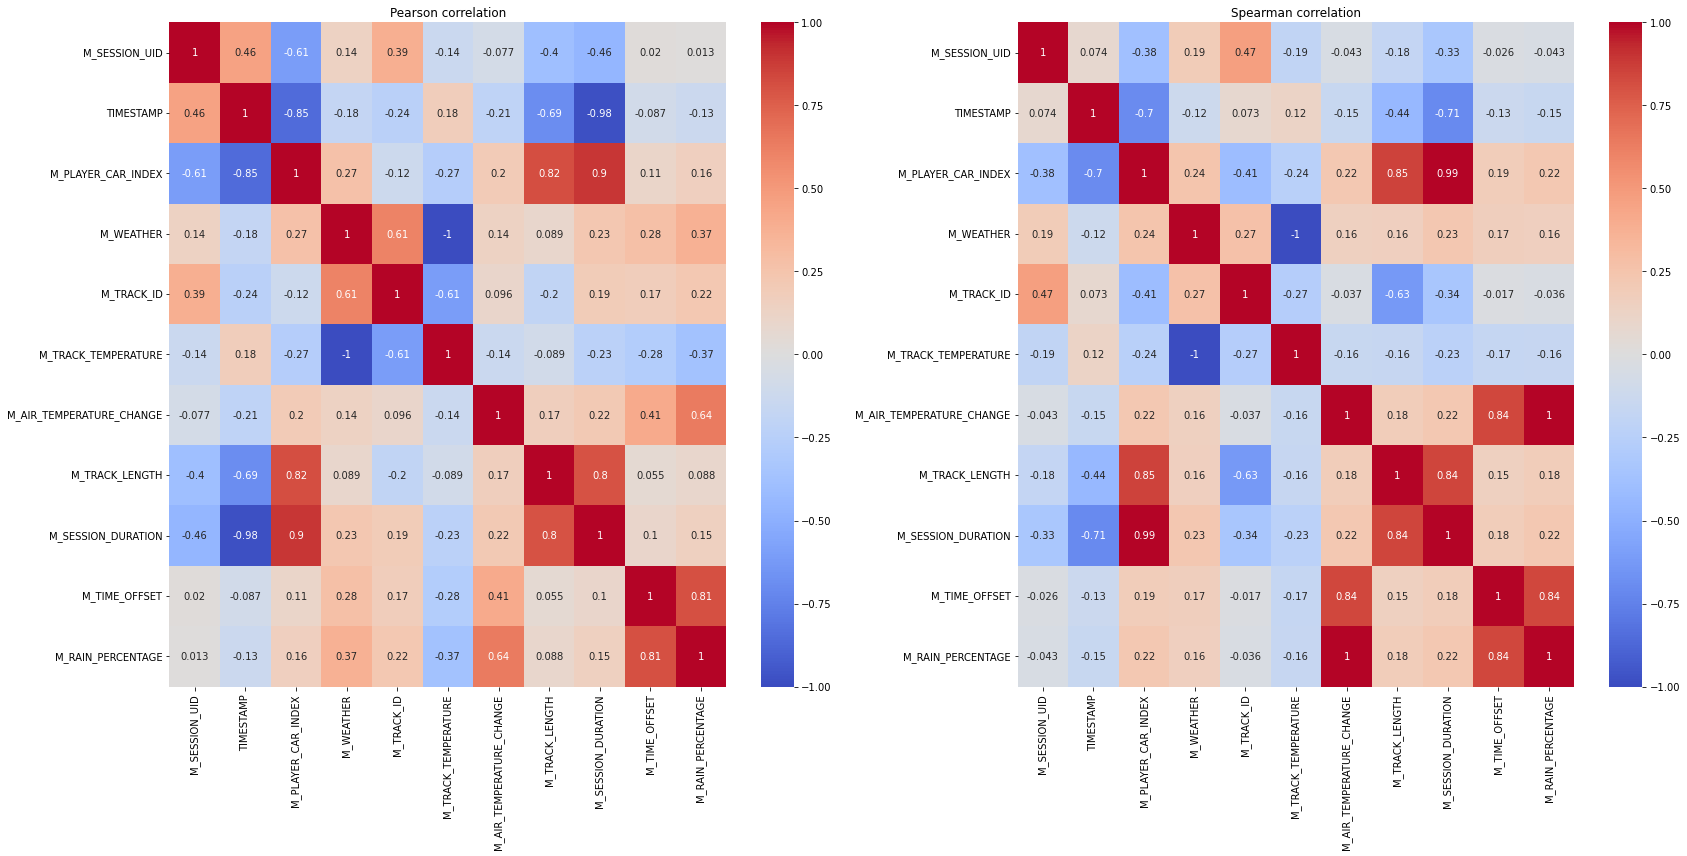

In [15]:
cols = ['M_SESSION_UID', 'TIMESTAMP', 'M_PLAYER_CAR_INDEX', 'M_WEATHER', 'M_TRACK_ID', 'M_TRACK_TEMPERATURE', 'M_AIR_TEMPERATURE_CHANGE', 'M_TRACK_LENGTH', 'M_SESSION_DURATION', 'M_TIME_OFFSET', 'M_RAIN_PERCENTAGE']

a = first_air_temp_df.loc[first_air_temp_df['M_AIR_TEMPERATURE'] == air_temp[2],cols]
fig, ax = plt.subplots(figsize=(24, 12))
plt.subplot(1, 2, 1)
sns.heatmap(a.corr(), cmap='coolwarm', annot=True)
plt.title('Pearson correlation')
plt.subplot(1, 2, 2)
sns.heatmap(a.corr(method="spearman"), cmap='coolwarm', annot=True)
plt.title('Spearman correlation')
plt.tight_layout()

## Scaling the Data

In [7]:
#Scaling the data
weather_type = df_without_null['M_WEATHER'].values
rain_percentage = df_without_null['M_RAIN_PERCENTAGE'].values
time_offset = df_without_null['M_TIME_OFFSET'].values

df_dummy = df_without_null.drop(['M_WEATHER', 'M_RAIN_PERCENTAGE', 'M_TIME_OFFSET'], axis = 1)
col_names = df_dummy.columns

r_scaler = RobustScaler()
df_r = r_scaler.fit_transform(df_dummy)

df_r = pd.DataFrame(df_r, columns=col_names)
df_r.insert(0, 'M_WEATHER', weather_type)
df_r.insert(1, 'M_RAIN_PERCENTAGE', rain_percentage)
df_r.insert(2, 'M_TIME_OFFSET', rain_percentage)

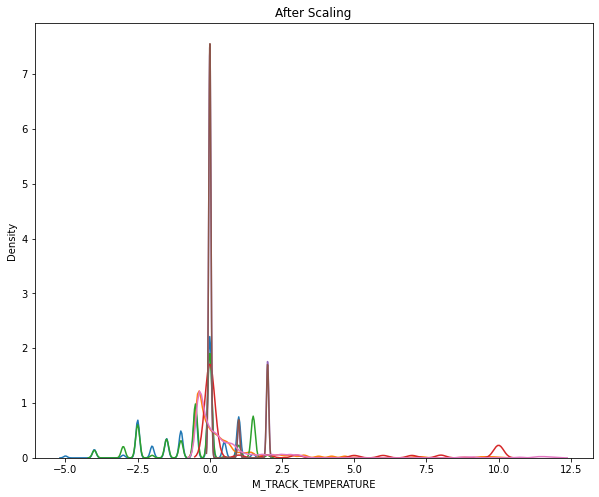

In [34]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Scaling')

sns.kdeplot(df_r['M_TRACK_TEMPERATURE'], ax=ax1)
sns.kdeplot(df_r['M_SESSION_TIME'], ax=ax1)
sns.kdeplot(df_r['M_AIR_TEMPERATURE'], ax=ax1)
sns.kdeplot(df_r['M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE'], ax=ax1)
sns.kdeplot(df_r['M_AIR_TEMPERATURE_CHANGE'], ax=ax1)
sns.kdeplot(df_r['M_TRACK_TEMPERATURE_CHANGE'], ax=ax1);
sns.kdeplot(df_r['M_FRAME_IDENTIFIER'], ax=ax1);

## Feature Importances

**To get feature importances in terms of M_WEATHER**

In [11]:
import gc
gc.collect()

122

In [13]:
X_f.shape

(2598053, 43)

In [14]:
y_f.shape

(2598053,)

[19:10:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:xlabel='feature'>

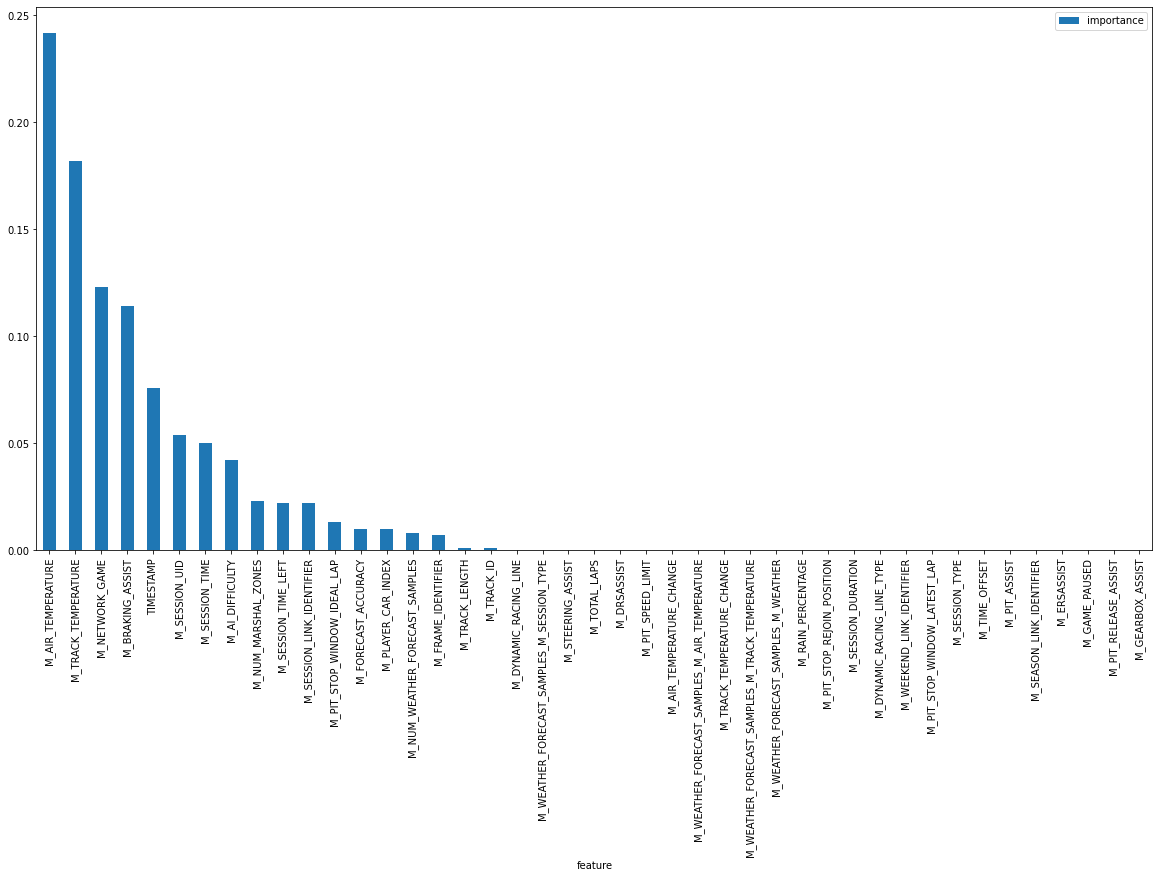

In [18]:
X_f = df_r.drop('M_WEATHER', axis=1)
y_f = df_r['M_WEATHER']

X_train, X_test, y_train, y_test = train_test_split(X_f, y_f, test_size = 0.1, random_state = 2)

xg_w = XGBClassifier(n_estimators = 100, tree_method = 'gpu_hist', objective = 'multi:softprob', random_state = 2)
xg_w.fit(X_train, y_train)

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(xg_w.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.plot.bar(figsize=(20,10))

**To get feature importances in terms of M_RAIN_PERCENTAGE**

<AxesSubplot:xlabel='feature'>

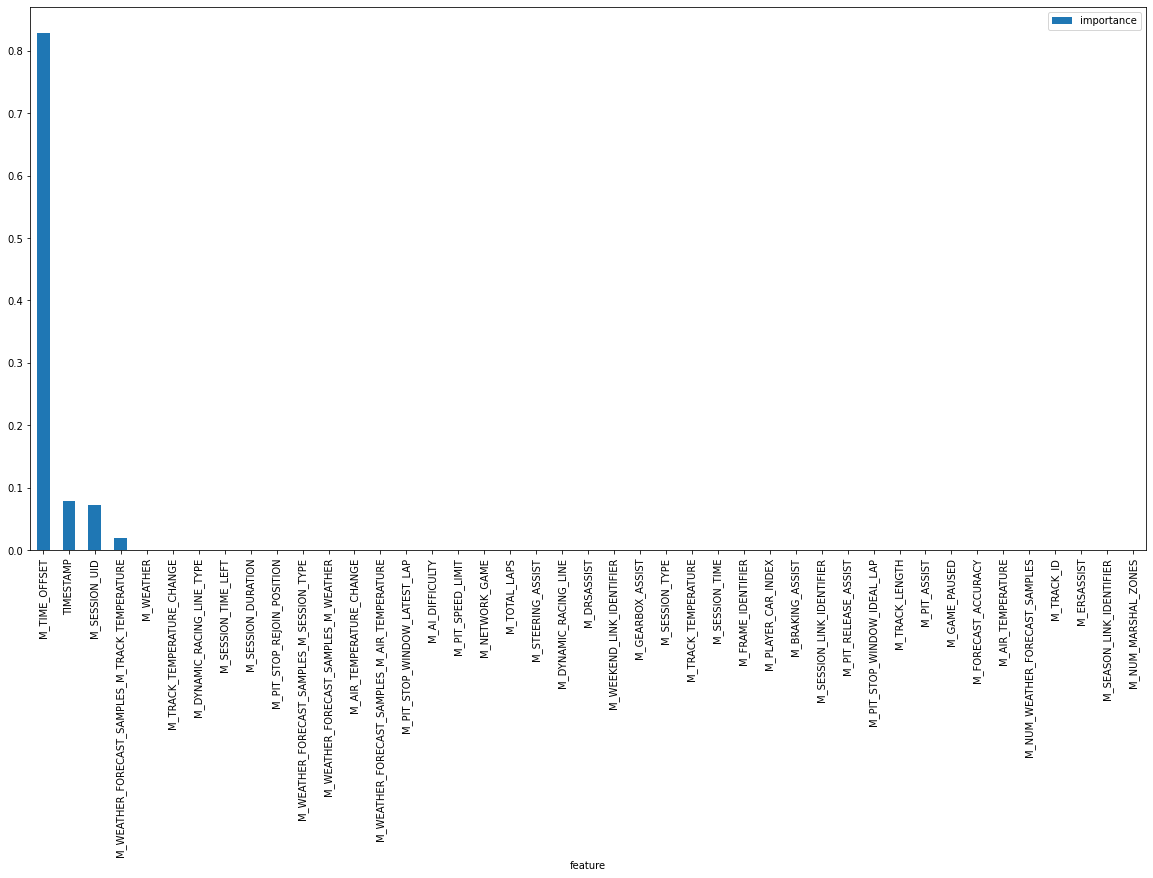

In [21]:
X_r = df_r.drop('M_RAIN_PERCENTAGE', axis=1)
y_r = df_r['M_RAIN_PERCENTAGE']

X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size = 0.1, random_state = 2)

xg_r = xgb.XGBRegressor(n_estimators = 100, tree_method = 'gpu_hist', objective='reg:squarederror', random_state = 2)
xg_r.fit(X_train, y_train)

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(xg_r.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.plot.bar(figsize=(20,10))

# Outlier Detection and Removal

In [24]:
M_WEATHER = df_r['M_WEATHER'] 
M_RAIN = df_r['M_RAIN_PERCENTAGE']

features_df = df_r.drop(['M_WEATHER', 'M_RAIN_PERCENTAGE'], axis = 1)

#Training the dataset with Isolation Forest to predict Outliers
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(features_df)

IsolationForest(n_jobs=-1, random_state=42)

In [25]:
#Getting the anomalous data

pred = clf.predict(features_df)
features_df['anomaly']=pred
outliers=features_df.loc[features_df['anomaly']==-1]
outlier_index=list(outliers.index)


outlier_label = []
outlier_label = list(pred)

#Here points classified -1 are anomalous
print(features_df['anomaly'].value_counts())

 1    1647348
-1     950705
Name: anomaly, dtype: int64


In [27]:
features_df.insert(0, 'M_WEATHER', M_WEATHER)
features_df.insert(1, 'M_RAIN_PERCENTAGE', M_RAIN)

ValueError: cannot insert M_WEATHER, already exists

In [28]:
normal_df = features_df.loc[features_df['anomaly']==1]
# normal_df.to_csv('df_without_anomaly.csv', index = False)

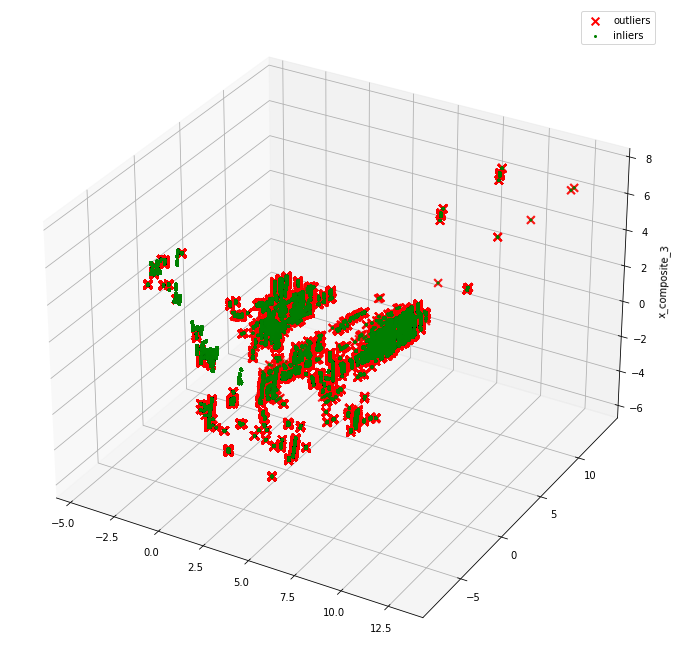

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(features_df)
X_reduce = pca.fit_transform(X)

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")


ax.legend()
plt.show()
plt.savefig('3D_Outlier.png')

## Apply Machine Learning Technique

In [34]:
train, test = train_test_split(normal_df, test_size = 0.1, random_state = 2)

In [36]:
test.to_csv('./test_samples.csv', index=False)

### Predicting Weather Type

In [37]:
X = train.drop('M_WEATHER', axis=1)
y = train['M_WEATHER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2)

In [38]:
xg = XGBClassifier(n_estimators = 100, tree_method = 'gpu_hist', objective = 'multi:softprob', random_state = 2)
xg.fit(X_train, y_train)
pred = xg.predict(X_test)

[19:32:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)
score = metrics.accuracy_score(y_test, pred)

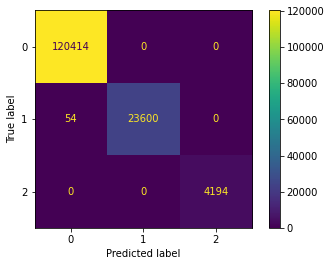

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, multilabel_confusion_matrix
cm = metrics.confusion_matrix(y_test, pred, labels=xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2'])
disp.plot()
plt.show()

In [42]:
cm_temp = multilabel_confusion_matrix(y_test, pred, labels=xg.classes_)

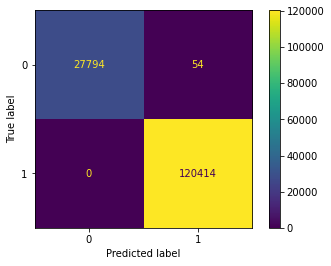

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_temp[0], display_labels=['0', '1'])
disp.plot()
plt.show()

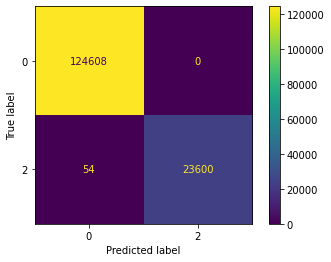

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_temp[1], display_labels=['0', '2'])
disp.plot()
plt.show()

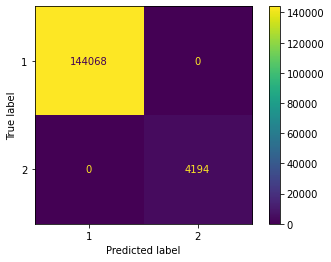

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_temp[2], display_labels=['1', '2'])
disp.plot()
plt.show()

In [46]:
print('Predicted labels: ', pred[:15])
print('Actual labels   : ' ,y[:15])

Predicted labels:  [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
Actual labels   :  1479519    0
761220     1
611281     0
2501056    0
1946697    0
2427625    0
668045     1
2447049    0
2568963    0
570213     1
2115421    0
1124642    0
2321971    0
1057882    0
2219832    0
Name: M_WEATHER, dtype: int64


In [47]:
class_report = classification_report(y_test, pred)
print(score)
print("---"*20)
print(class_report)

0.9996357799031445
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120414
           1       1.00      1.00      1.00     23654
           2       1.00      1.00      1.00      4194

    accuracy                           1.00    148262
   macro avg       1.00      1.00      1.00    148262
weighted avg       1.00      1.00      1.00    148262



#### Saving the Model

In [48]:
test_df = pd.read_csv('test_samples.csv')

X_t = test_df.drop('M_WEATHER', axis=1)
y_t = test_df['M_WEATHER']

In [49]:
import pickle
filename = 'vb_anomaly_weather.pkl'

with open(filename, 'wb') as file:  
    pickle.dump(xg, file)

with open(filename, 'rb') as file:  
    pickled_xg = pickle.load(file)

pred_test = pickled_xg.predict(X_t)

In [50]:
print('Predicted labels: ', pred_test[:15])
print('Actual labels   : ' ,y_t[:15])

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 1 0 1 0 0]
Actual labels   :  0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    0
Name: M_WEATHER, dtype: int64


### Predicting Intensity of the Rain

In [54]:
X_rain = train.drop('M_RAIN_PERCENTAGE', axis=1)
y_rain = train['M_RAIN_PERCENTAGE']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_rain, y_rain, test_size = 0.1, random_state = 2)

In [55]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(n_estimators=100,tree_method = 'gpu_hist', objective='reg:squarederror', random_state=2)
xg_reg.fit(X_train_r, y_train_r)
pred_r = xg_reg.predict(X_test_r)

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss
rmse_r = np.sqrt(mean_squared_error(y_test_r, pred_r))
mae_r = mean_absolute_error(y_test_r, pred_r)
score_r = metrics.r2_score(y_test_r, pred_r)
print("Score: %f" % (score_r))
print("RMSE: %f" % (rmse_r))
print("MAE: %f" % (mae_r))

Score: 1.000000
RMSE: 0.000001
MAE: 0.000000


In [58]:
res_w = "\n".join("{}\t\t{}".format(x, y) for x, y in zip(y_test_r[:15], pred_r[:15]))
print(res_w)

0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
1.0		0.9999984502792358
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07


#### Saving the model

In [60]:
test_df = pd.read_csv('./test_samples.csv')

X_rain_t = test_df.drop('M_RAIN_PERCENTAGE', axis=1)
y_rain_t = test_df['M_RAIN_PERCENTAGE']

In [62]:
import pickle
filename = 'vb_anomaly_rain.pkl'

with open(filename, 'wb') as file:  
    pickle.dump(xg_reg, file)

with open(filename, 'rb') as file:  
    pickled_xg_rain = pickle.load(file)

pred_rain_test = pickled_xg_rain.predict(X_rain_t)

In [63]:
res_rain = "\n".join("{}\t\t{}".format(x, y) for x, y in zip(y_rain[:15], pred_rain_test[:15]))
print(res_rain)

0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		2.6054976842715405e-07
0.0		3.99999737739563
0.0		2.6054976842715405e-07


In [65]:
normal_df.to_csv('./normal_df.csv', index=False)